<a href="https://colab.research.google.com/github/taceroc/light_echo_modeling/blob/main/spherical_blub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D


from astropy.coordinates import (cartesian_to_spherical, SkyCoord, Distance, Galactic, EarthLocation, AltAz, CartesianRepresentation, SphericalRepresentation)
from astropy import units as u
# Calculate observer's local sidereal time (LST)
from astropy.time import Time
from astropy.coordinates import EarthLocation

plt.style.use('seaborn-v0_8-colorblind')

%config InlineBackend.figure_format='retina'

# Draw of what I want to do

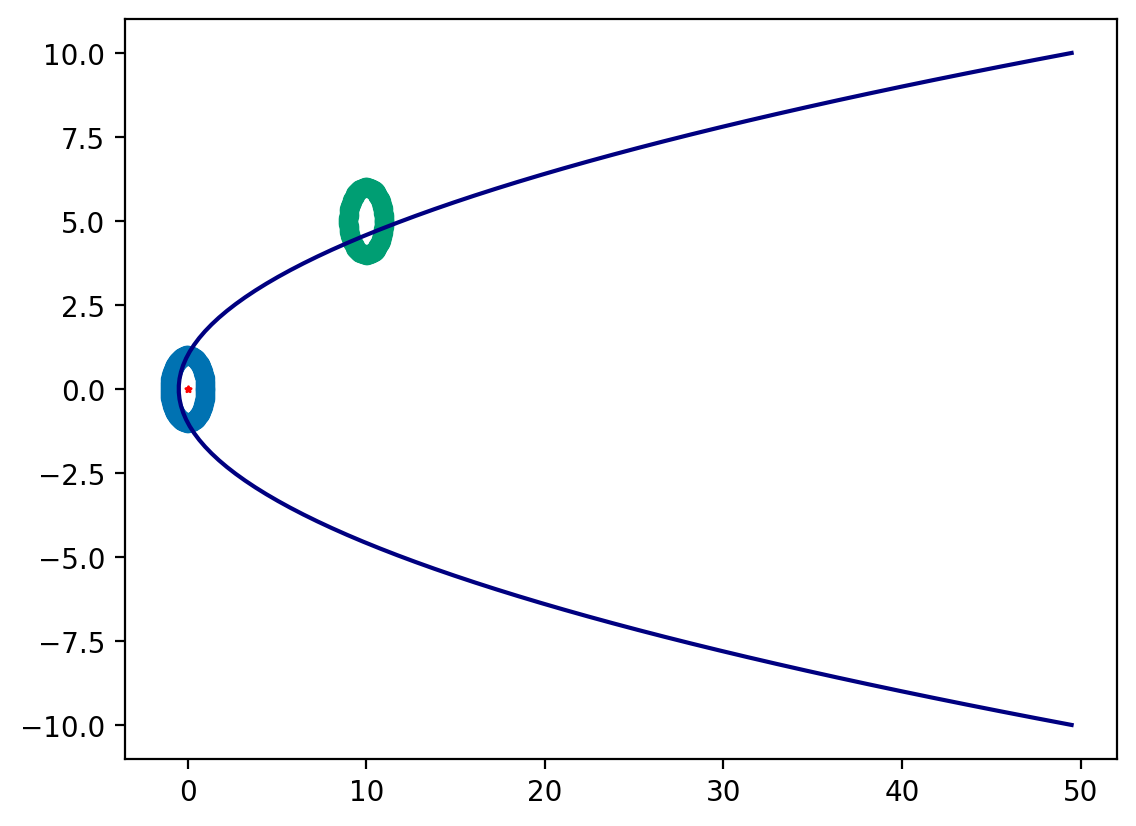

In [14]:
rr = 1
theta = np.linspace(0, 2*np.pi, 100)
plt.scatter(rr*np.cos(theta), rr*np.sin(theta))
plt.scatter(0,0, marker = "*", s = 4, color = "red")
plt.scatter(rr*np.cos(theta) +10, rr*np.sin(theta) + 5 )
ct = 1
# z = np.linspace(-0.999/2,17,100)
x = np.linspace(-10,10,100)
z = (x**2 - ct**2) / (2 * ct)
plt.plot(z, x, c = "navy", label = "ct=1");

In [11]:
x_p = np.linspace(-10,10,100)
y_p = np.linspace(-10,10,100)

x_p, y_p = np.meshgrid(x_p, y_p)
z_p = (x_p**2 + y_p**2 - ct**2) / (2 * ct)
# z_p = np.zeros((len(x_p), len(y_p)))
# z = (x**2 - y**2 - ct**2) / (2 * ct)

In [12]:
z_p.shape

(100, 100)

Text(0.5, 1.0, 'x0 = 4.14, y0 = -1.31, z0 = 8.94')

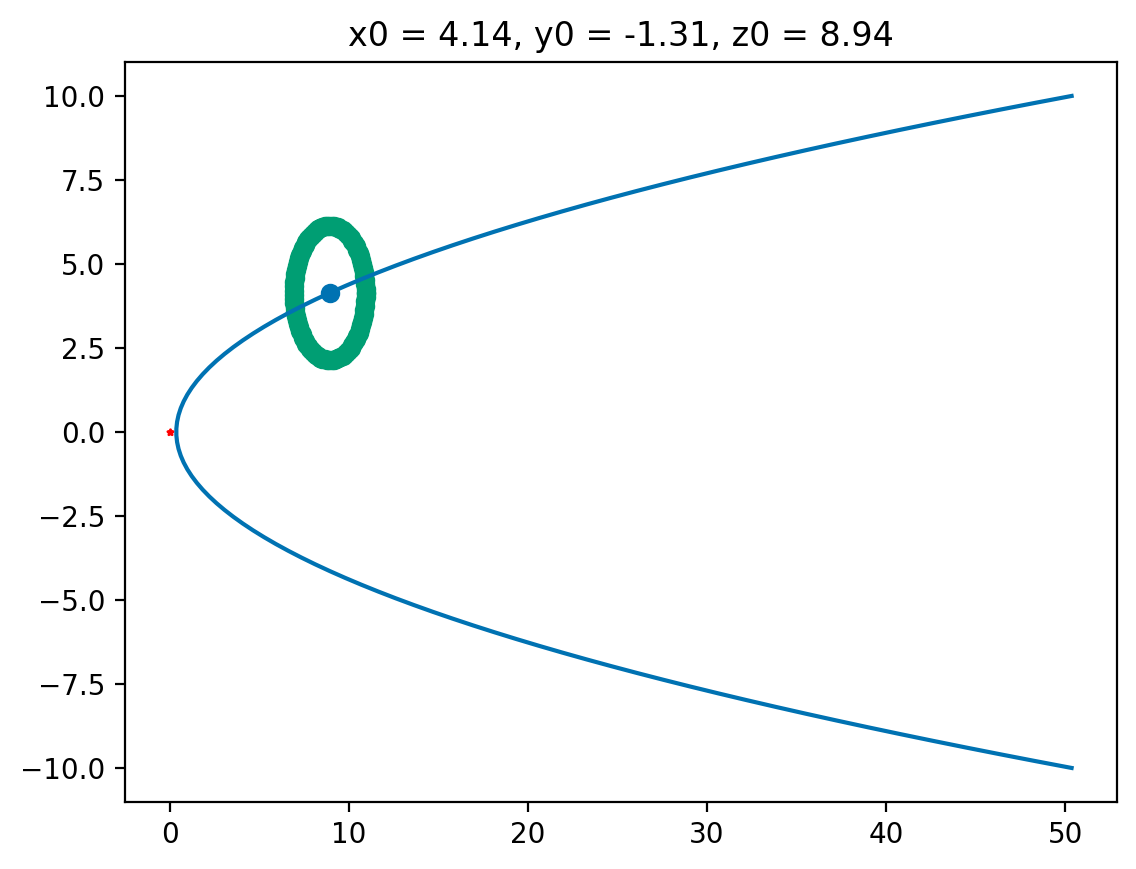

In [38]:
plt.plot(z_p[43,:], x_p[43, :])
plt.scatter(0,0, marker = "*", s = 4, color = "red")
theta = np.linspace(0, 2*np.pi, 100)
plt.scatter(z_p[43,70], x_p[43,70])
rr = 2
plt.scatter(rr*np.cos(theta) + z_p[43,70] , rr*np.sin(theta) + x_p[43,70])
plt.title("x0 = %.2f, y0 = %.2f, z0 = %.2f"%(x_p[43, 70], y_p[43, 70], z_p[43, 70]))



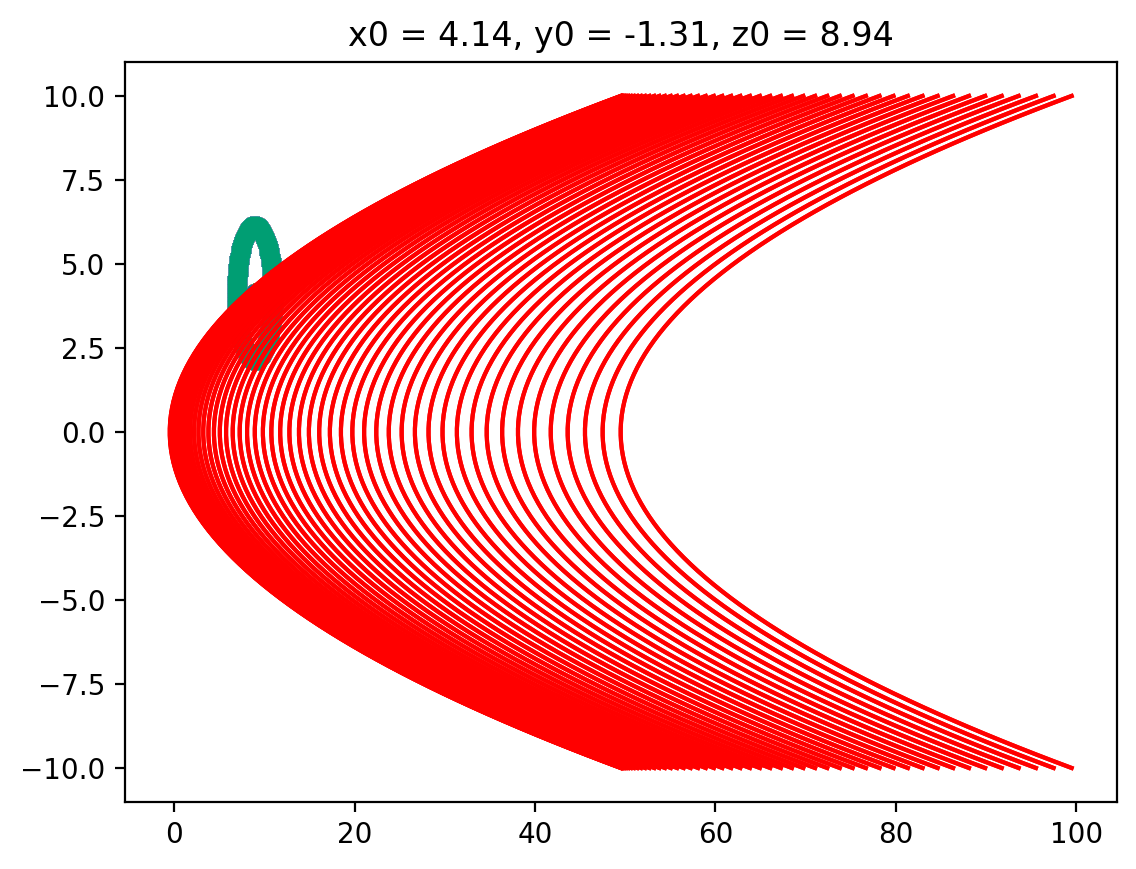

In [44]:
for i in range(100):
  plt.plot(z_p[i,:], x_p[i, :], color ="red" )
  plt.scatter(0,0, marker = "*", s = 4, color = "red")
  theta = np.linspace(0, 2*np.pi, 100)
  plt.scatter(z_p[43,70], x_p[43,70])
  plt.title("x0 = %.2f, y0 = %.2f, z0 = %.2f"%(x_p[43, 70], y_p[43, 70], z_p[43, 70]))
  rr = 2
  plt.scatter(rr*np.cos(theta) + z_p[43,70] , rr*np.sin(theta) + x_p[43,70])

# Simulate firs the shape

In [45]:
r0 = 8
x_p = np.linspace(-10,10,100)
y_p = np.linspace(-10,10,100)

x_p, y_p = np.meshgrid(x_p, y_p)
z_p = (x_p**2 + y_p**2 - ct**2) / (2 * ct)
z_e = np.sqrt(r0**2 - (x_p-x_p[43, 70])**2 - (y_p-y_p[43, 70])**2) + z_p[43, 70]
z_e2 = -np.sqrt(r0**2 - (x_p-x_p[43, 70])**2 - (y_p-y_p[43, 70])**2) + z_p[43, 70]



<ipython-input-45-d97f08799e60>:7: RuntimeWarning: invalid value encountered in sqrt
  z_e = np.sqrt(r0**2 - (x_p-x_p[43, 70])**2 - (y_p-y_p[43, 70])**2) + z_p[43, 70]
<ipython-input-45-d97f08799e60>:8: RuntimeWarning: invalid value encountered in sqrt
  z_e2 = -np.sqrt(r0**2 - (x_p-x_p[43, 70])**2 - (y_p-y_p[43, 70])**2) + z_p[43, 70]


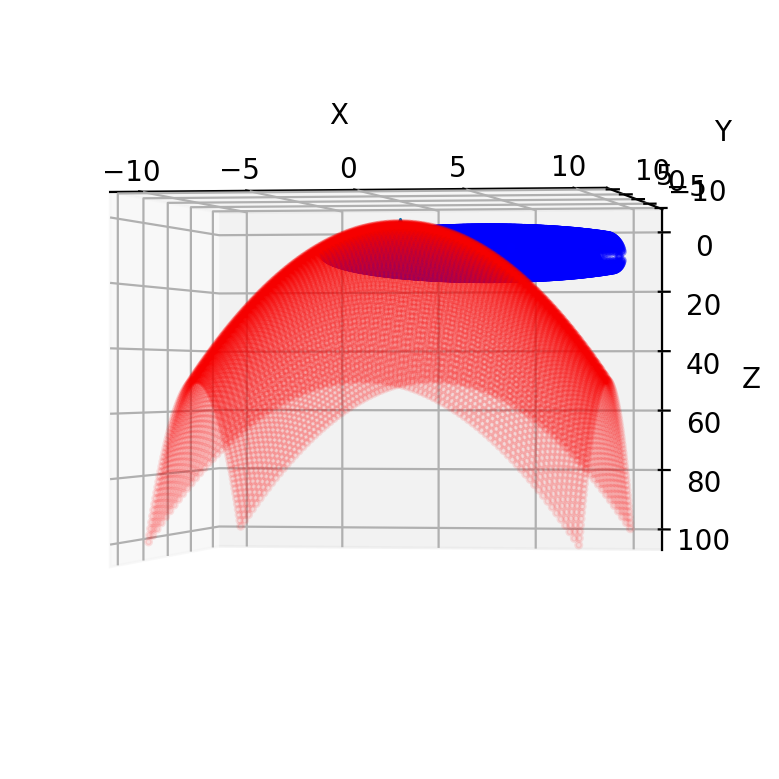

In [48]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.scatter(0,0,0, marker = "*")
ax.scatter(x_p, y_p, z_p, c='r', marker='.', alpha = 0.1)
ax.scatter(x_p, y_p, z_e, c='b', marker='.')
ax.scatter(x_p, y_p, z_e2, c='b', marker='.')


ax.scatter(x_p[43,70], y_p[43,70],z_p[43,70])


# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=-180, azim = -100)

# plt.title('Parametric Equation for a Sphere')
plt.show()


In [49]:
x.shape

(100,)

## Determine the intersection points

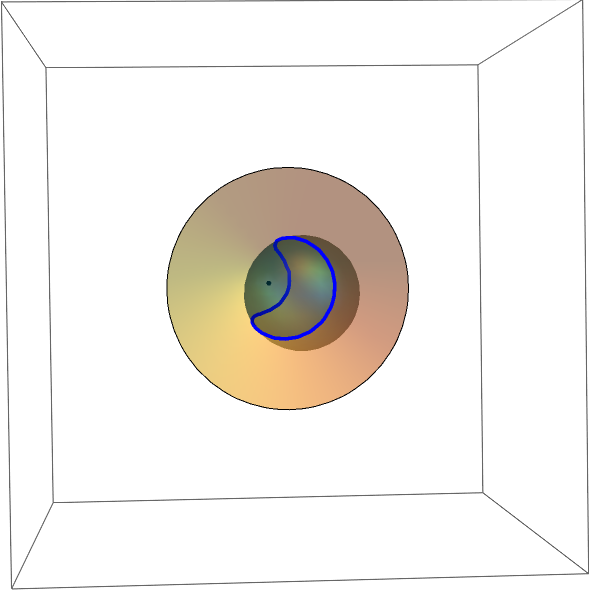

All points inside the "crescent" form the LE. The sphere is thick

In [124]:
Deltat = 200 # days
dtoy = 0.00273973 # 1 day = 0.00273973 y
Deltat_y = np.array(Deltat) * dtoy
pctoly = 3.26156 # 1pc = 3.26156 light-year
dt0 = 97 * dtoy
r0 = 2.5 * pctoly
dz0 = 2 * r0 # in ly

# https://iopscience.iop.org/article/10.1088/0004-6256/135/2/605/pdf
c = 1 # in light-year / year
ct = Deltat * dtoy

dkpc = 6.1#5 #kpc
d = dkpc * 1000 * pctoly



x_p = np.linspace(-10,10,100)
y_p = np.linspace(-10,10,100)

x_p, y_p = np.meshgrid(x_p, y_p)
z_p = (x_p**2 + y_p**2 - ct**2) / (2 * ct)
z_e = np.sqrt(r0**2 - (x_p-x_p[43, 70])**2 - (y_p-y_p[43, 70])**2) + z_p[43, 70]
z_e2 = -np.sqrt(r0**2 - (x_p-x_p[43, 70])**2 - (y_p-y_p[43, 70])**2) + z_p[43, 70]

# Define the radius and center of the sphere
h = x_p[43, 70]
k = y_p[43, 70]
l = z_p[43, 70]
center = (h, k, l)

# Find points of intersection
intersection_points = []

for i in range(100):
  for j in range(100):
    x_par, y_par, z_par = x_p[i,j], y_p[i,j], z_p[i,j]

    # Check if the point is inside both the sphere and the paraboloid
    sphere_condition = ((x_par - center[0])**2 + (y_par - center[1])**2 + (z_par - center[2])**2) <= r0**2
    paraboloid_condition = (x_par**2 + y_par**2) <= (ct**2 + 2 * ct * z_par)

    if (sphere_condition and paraboloid_condition):
        intersection_points.append((x_par, y_par, z_par))



<ipython-input-124-435142620339>:23: RuntimeWarning: invalid value encountered in sqrt
  z_e = np.sqrt(r0**2 - (x_p-x_p[43, 70])**2 - (y_p-y_p[43, 70])**2) + z_p[43, 70]
<ipython-input-124-435142620339>:24: RuntimeWarning: invalid value encountered in sqrt
  z_e2 = -np.sqrt(r0**2 - (x_p-x_p[43, 70])**2 - (y_p-y_p[43, 70])**2) + z_p[43, 70]


In [125]:
np.array(intersection_points).shape

(749, 3)

In [127]:
x_inter = np.array([inter[0] for inter in intersection_points])
y_inter = np.array([inter[1] for inter in intersection_points])
z_inter = np.array([inter[2] for inter in intersection_points])

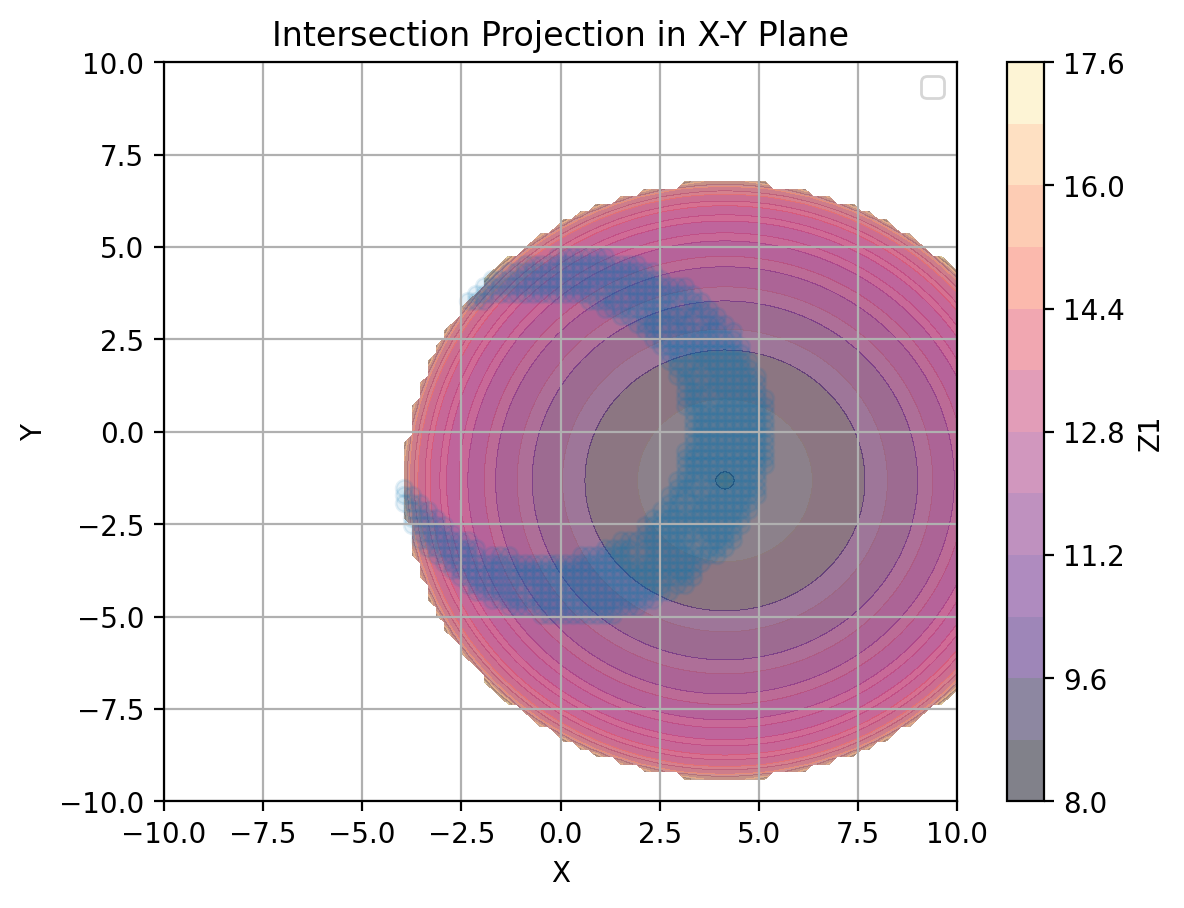

In [128]:
# Create a contour plot in the X-Y plane (Z=0)
plt.figure()
plt.contourf(x_p, y_p, z_e, levels = 10, cmap='magma', alpha=0.5)
plt.contourf(x_p, y_p, z_e2, levels = 10, cmap='magma', alpha=0.5)

plt.colorbar(label='Z1')
# plt.contour(x_p, y_p, z_p, levels = 10, colors='red', linewidths=2, label='Intersection')
plt.scatter(x_inter, y_inter, alpha = 0.1)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Intersection Projection in X-Y Plane')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [129]:
new_xs = np.arctan(x_inter / d) * (180 / np.pi) * 3600
new_ys = np.arctan(y_inter / d) * (180 / np.pi) * 3600

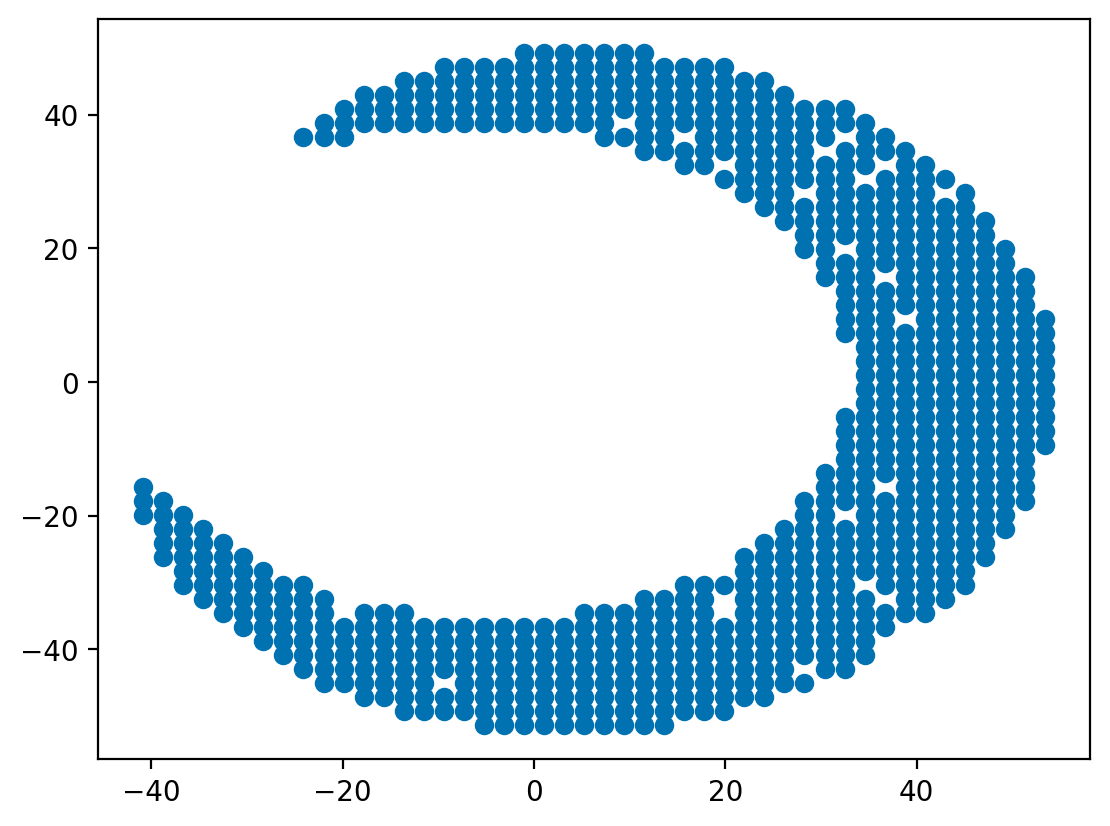

In [130]:
plt.scatter(new_xs, new_ys)

## Determine dust distribution and surface brightness

In [131]:
def dust(x_inter, n_h = 1):
  np.random.seed(52)
  grid = np.random.uniform(0, 1, len(x_inter))
  # -- data cube with 3 dimension 0: x values, 1: z values, 2: value of the density in that x,z in the projected plane
  data_cube = grid * n_h

  return data_cube

In [132]:
pctoly = 3.26156 # 1pc = 3.26156 light-year
pctom = 3.086e+16 # pc to meter
n = 1 * (100 ** 3) #m-3
n = n * ( pctom ** 3 ) / ( pctoly ** 3 )
sigma = 5e-22 / (100 ** 2) #m2 #RR paper
sigma = ( sigma / ( (pctom ** 2) ) ) * ( pctoly ** 2 )
albedo = 0.6

# k = sigma * albedo * Fphi
# L = 15,000 x 3.9e26 # watts = kg m ^2 / s^3
L = (15e3 * 3.9e36) * ((60 * 60 * 24 * 365) ** 3) * (pctoly ** 2) / (pctom ** 2)
# Ir = k * L * c / (4 * np.pi * (dkpc * 1000 * pctoly)**2)
Fphi = 1
Ir = albedo * sigma * L * c * Fphi / (4 * np.pi * (d)**2)


def scatter_phase_function(g = 0, scatter_angle = 90):
  mu =  np.cos(np.deg2rad(scatter_angle))
  return ((1 - g**2) / (1 + g**2  - 2 * g * mu)**(3/2) ) / 4 * np.pi

In [133]:
def surface_brightness(x_inter, y_inter, z_inter, ct, data_cube, Ir, dz0, dt0, d, g = 0):

  r = np.sqrt(x_inter**2 + y_inter**2 + z_inter**2)

  rhos = np.sqrt(2 * z_inter * ct + (ct)**2 )
  half_obs_thickness = np.sqrt( (ct / rhos) ** 2 * dz0 ** 2 + ( (rhos * c / 2 * ct) + ( c * ct / 2 * rhos )) ** 2 * dt0  ** 2 )
  rhodrho = rhos * half_obs_thickness

  # diag = np.sqrt((0-x_inter)**2 + (z0ly - z_inter)**2)
  if g == 0:
    Fphi = scatter_phase_function(g = 0, scatter_angle = 90)
    surface = np.zeros(len(r))
    # print(r.shape)
    for ff in range(len(x_inter)):
        # Fphi = scatter_phase_function(scatter_angle = delta)
        surface[ff] = Ir * Fphi * data_cube[ff] * dz0 / ( 4 * np.pi * r[ff] * rhodrho[ff] )
        # print(data_cube[ff, ff, ff, 3])
  else:
    # print("here")
    ll = np.sqrt(x_inter**2 + y_inter**2 + (z_inter-d)**2)
    cossigma = (ll**2 + r**2 - d**2) / (2 * ll * r)
    # print(cossigma)
    Fphi_arr = np.zeros(len(r))
    for ik, rm in enumerate(cossigma):
      if ((rm >= -1) and (rm <= 1)):
        sigma = np.arccos(rm)
        Fphi_arr[ik] = scatter_phase_function(g = g, scatter_angle = sigma)
      else:
        Fphi_arr[ik] = 0
        # print( Fphi_arr[ik])
    surface = np.zeros(len(r))
    # print(r.shape)
    for ff in range(len(x_inter)):
        # Fphi = scatter_phase_function(scatter_angle = delta)
        surface[ff] = Ir * Fphi_arr[ff] * data_cube[ff, ff, ff, 3] * dz0 / ( 4 * np.pi * r[ff] * rhodrho[ff] )



  return surface

In [134]:
data_cube = dust(x_inter, n_h = n)
surface = surface_brightness(x_inter, y_inter, z_inter, ct, data_cube, Ir, dz0, dt0, d, g = 0)

## Plot of initial LE, no including the thickness due to the duration of the flash

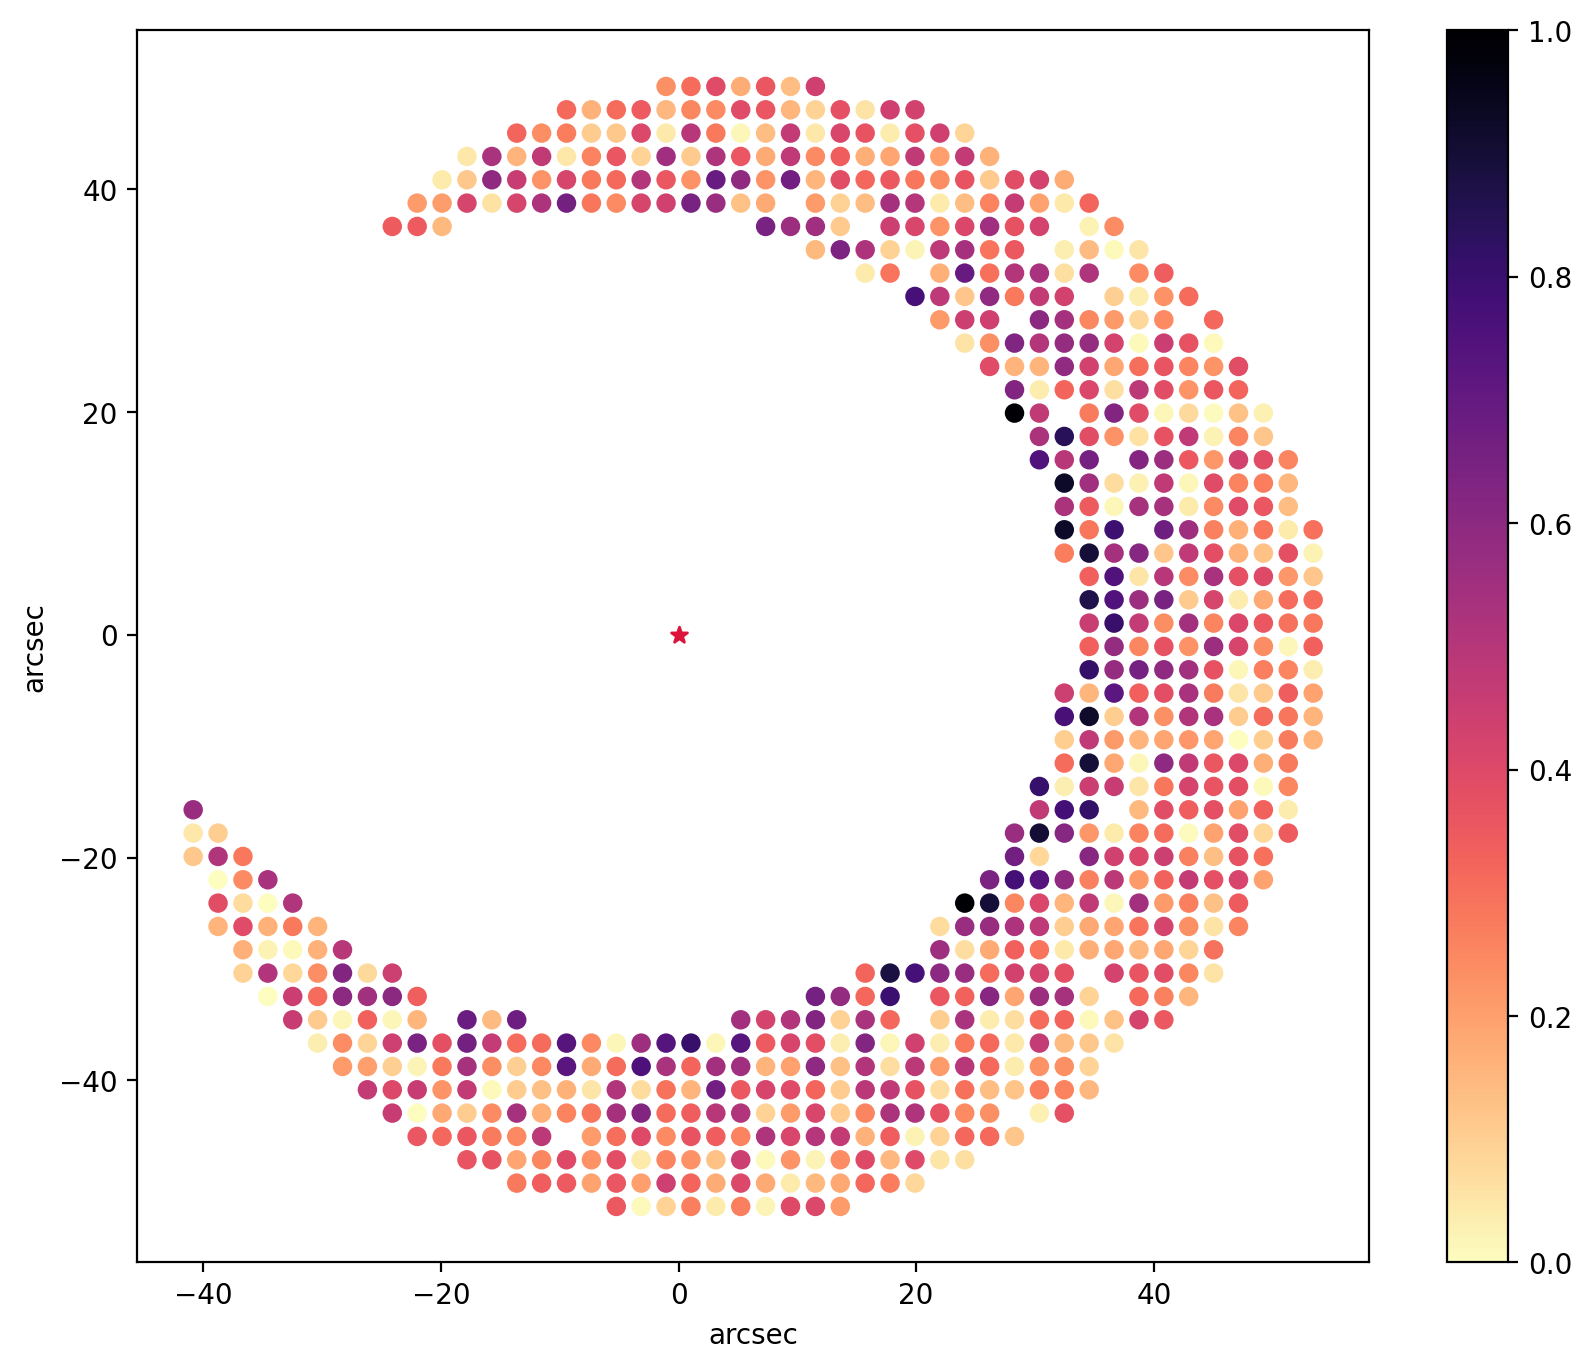

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
surface_300_norm = ( surface.copy() - np.nanmin(surface.copy())  ) / (np.nanmax(surface.copy()) - np.nanmin(surface.copy()))
# cmap = matplotlib.colormaps.get_cmap('magma_r')
# normalize = matplotlib.colors.Normalize(vmin=np.nanmin(surface_300_norm), vmax=np.nanmax(surface_300_norm))
ax.scatter(0, 0, marker = "*", color = "crimson")
cbarr = ax.scatter(new_xs, new_ys, c=surface_300_norm, cmap = "magma_r")
ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
ax.set_box_aspect(1)
plt.colorbar(cbarr)

In [136]:
def rinout(y_inter, x_inter, z_inter, ct, dt0, d, r0):
  phis = np.arctan2(y_inter, x_inter)
  # zz = (l - ct) + np.sqrt(r0**2 - h**2 - k**2 + 2 * (x_inter * h - y_inter * k - l * ct))
  rhos = np.sqrt(2 * z_inter * ct + (ct)**2 )
  half_obs_thickness = np.sqrt( (ct / rhos) ** 2 * dz0 ** 2 + ( (rhos * c / 2 * ct) + ( c * ct / 2 * rhos )) ** 2 * dt0  ** 2 ) / 2
  # -- include the thickness in xy plane
  r_le_out = rhos + half_obs_thickness
  # -- degree to arcseconds
  r_le_out = np.arctan(r_le_out / d) * (180 / np.pi) * 3600
  r_le_in = rhos - half_obs_thickness
  r_le_in = np.arctan(r_le_in / d) * (180 / np.pi) * 3600


  return phis, r_le_out, r_le_in, rhos, half_obs_thickness

In [137]:
phis, r_le_out, r_le_in, rhos, half_obs_thickness = rinout(y_inter, x_inter, z_inter, ct, dt0, d, r0)

In [138]:
half_obs_thickness.shape

(749,)

In [139]:
def final_xy_projected(phis, r_le_out, r_le_in):
    radii_p = [r_le_out, r_le_in]
    # xs_p = np.outer(radii_p, np.cos(phis)) - act
    xs_p = np.concatenate([radii_p[0] * np.cos(phis), radii_p[1] * np.cos(phis)]).reshape(2, len(phis))
    ys_p = np.concatenate([radii_p[0] * np.sin(phis), radii_p[1] * np.sin(phis)]).reshape(2, len(phis))
    # ys_p = np.outer(radii_p, np.sin(phis))
    # print(xs_p.shape)

    new_xs = xs_p.reshape(1,2,len(phis))
    new_ys = ys_p.reshape(1,2,len(phis))

    return new_xs, new_ys

In [140]:
new_xs_proj, new_ys_proj = final_xy_projected(phis, r_le_out, r_le_in)

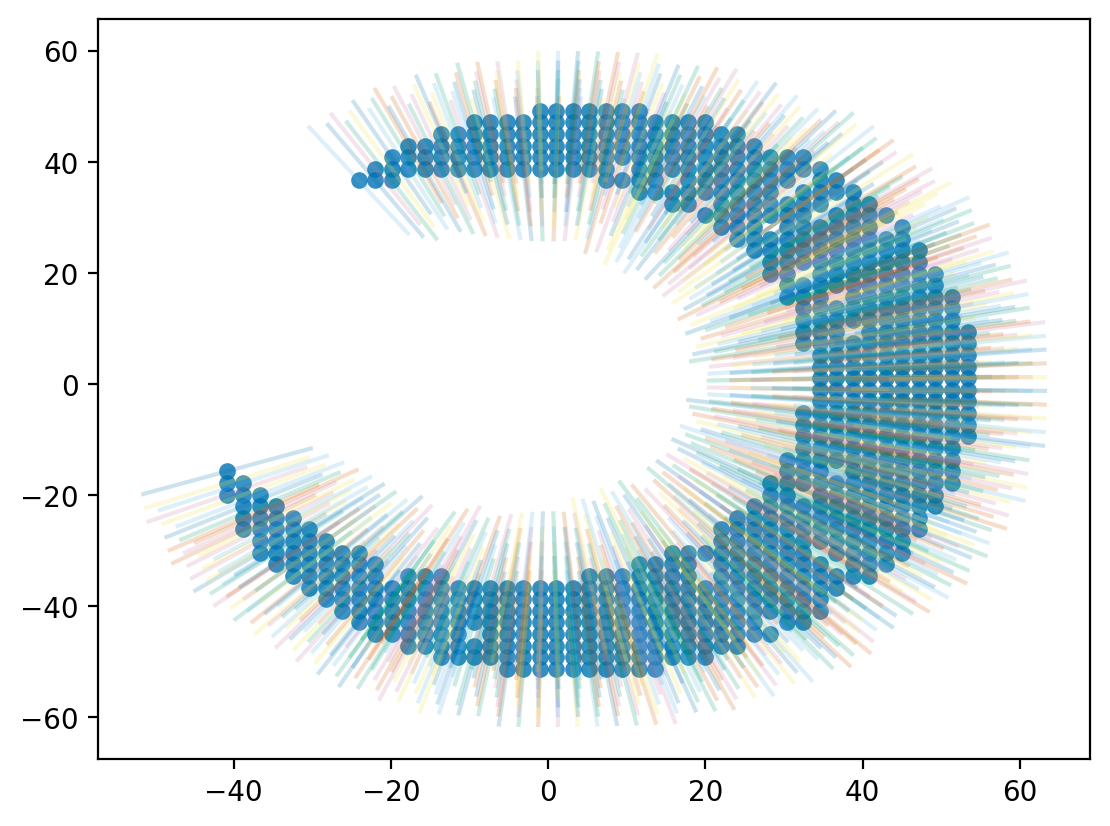

In [141]:
plt.plot(new_xs_proj[0,:,:], new_ys_proj[0,:,:], alpha = 0.2)
plt.scatter(new_xs, new_ys, alpha = 0.8, linewidth = 0)

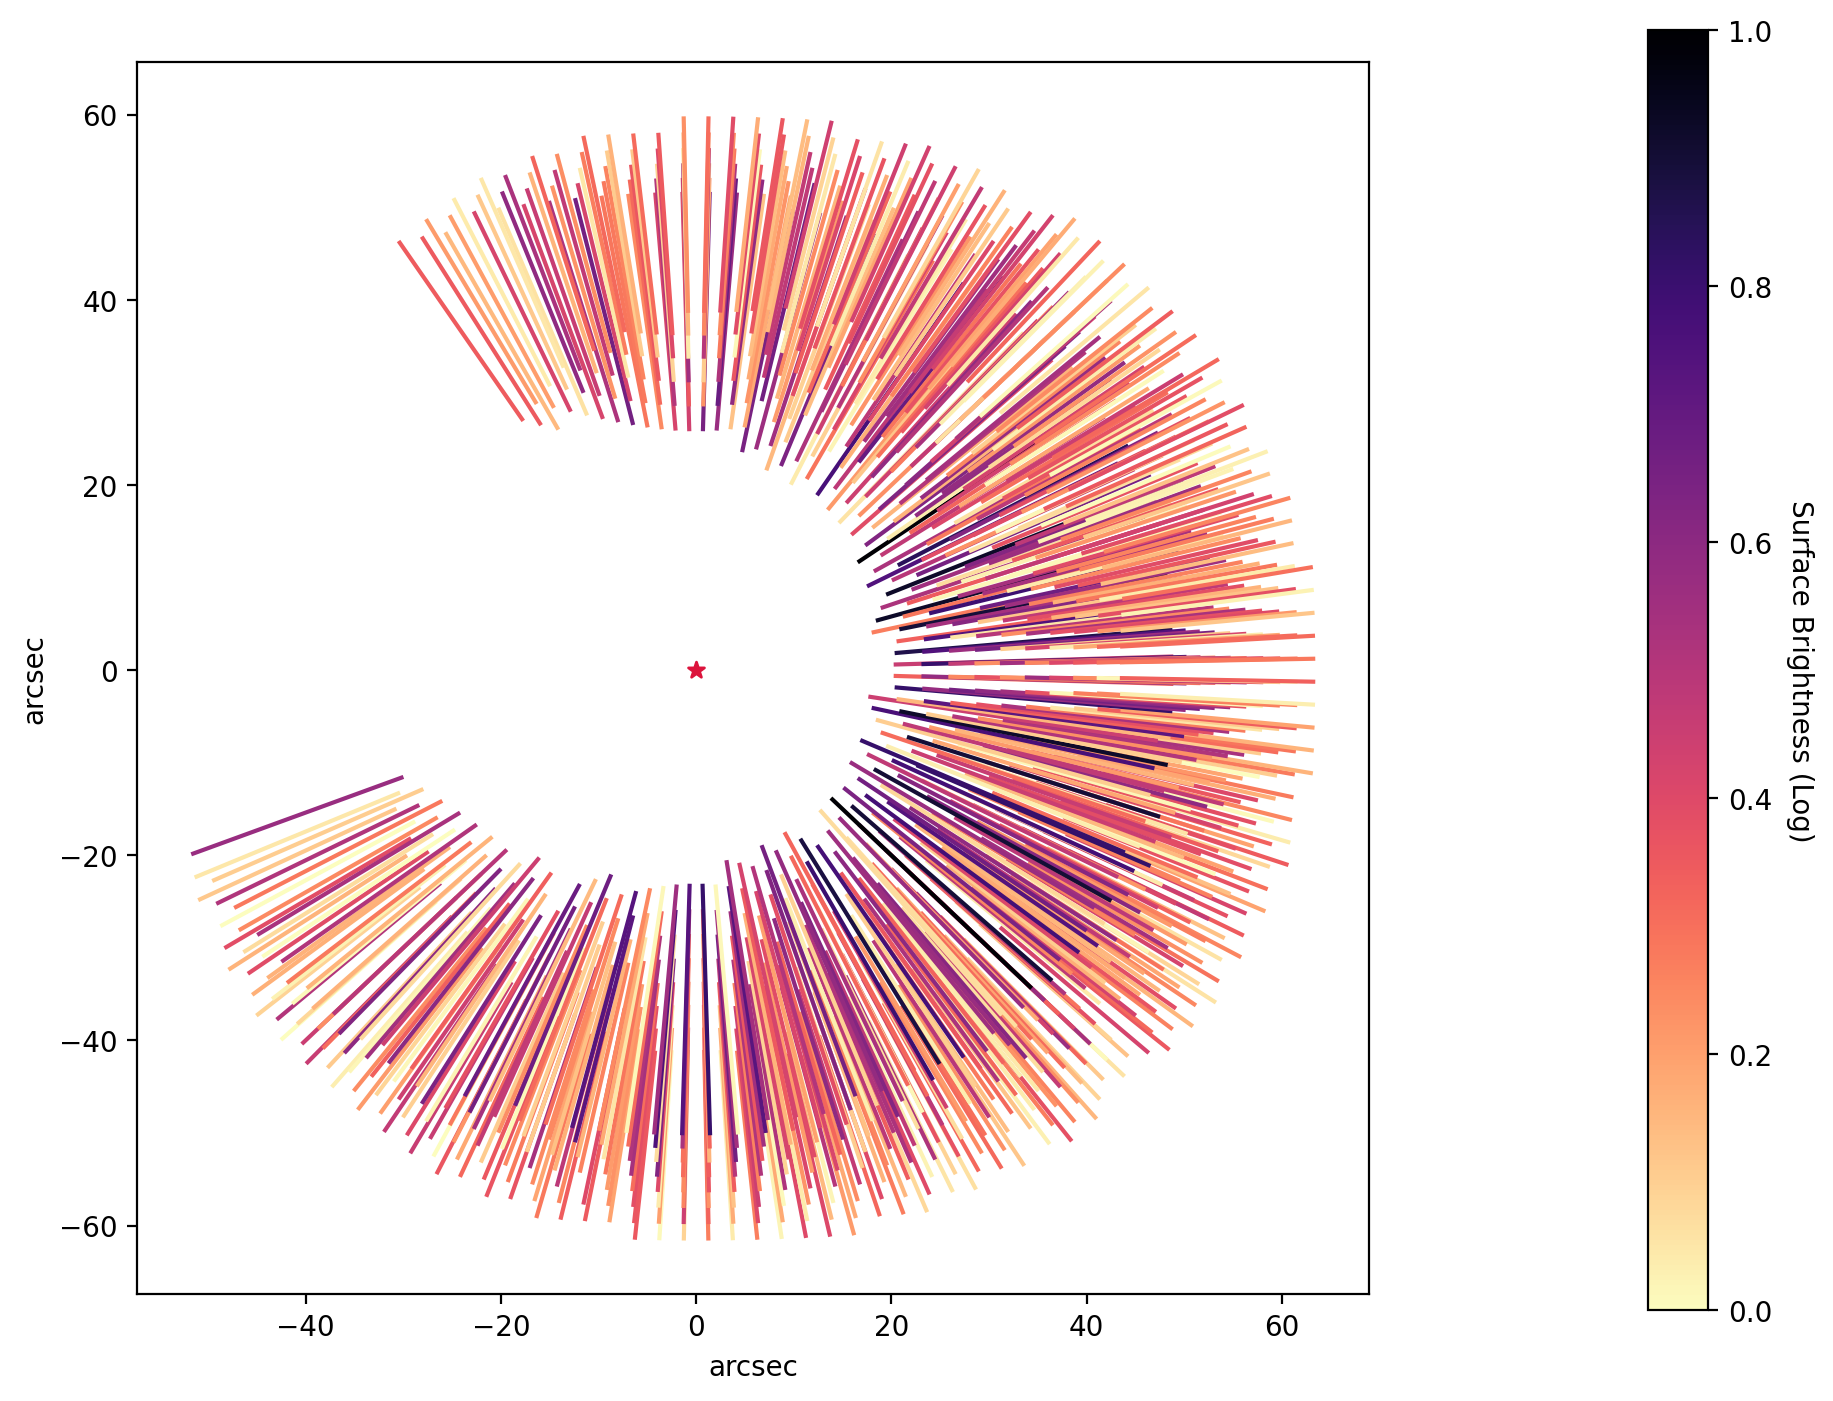

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
surface_300_norm = ( surface.copy() - np.nanmin(surface.copy())  ) / (np.nanmax(surface.copy()) - np.nanmin(surface.copy()))
cmap = matplotlib.colormaps.get_cmap('magma_r')
normalize = matplotlib.colors.Normalize(vmin=np.nanmin(surface_300_norm), vmax=np.nanmax(surface_300_norm))
ax.scatter(0, 0, marker = "*", color = "crimson")

for k in range(len(surface)):
  cbar = ax.plot(new_xs_proj[0, :, k], new_ys_proj[0, :, k], color=cmap(normalize(surface_300_norm[k])))
# cbarr = ax.plot(new_xs_proj[0,:,:], new_ys_proj[0,:,:], c=surface_300_norm, cmap = "magma_r")
ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
ax.set_box_aspect(1)


cbax = fig.add_axes([0.96, 0.1, 0.03, 0.80])
cb1 = matplotlib.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb1.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

def label_cbrt(x,pos):
    return "{:.1f}".format(x)

cb1.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)